# Local AutoML training

### Ressources
- https://github.com/automl/auto-sklearn/issues/1684
- https://geemap.org/notebooks/46_local_rf_training/

## Install auto-sklearn

In [1]:
# 1. uninstall all affected packages
!pip uninstall -y Cython scipy pyparsing scikit_learn imbalanced-learn mlxtend yellowbrick

Found existing installation: Cython 3.0.6
Uninstalling Cython-3.0.6:
  Successfully uninstalled Cython-3.0.6
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: pyparsing 3.1.1
Uninstalling pyparsing-3.1.1:
  Successfully uninstalled pyparsing-3.1.1
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Found existing installation: mlxtend 0.22.0
Uninstalling mlxtend-0.22.0:
  Successfully uninstalled mlxtend-0.22.0
Found existing installation: yellowbrick 1.5
Uninstalling yellowbrick-1.5:
  Successfully uninstalled yellowbrick-1.5


In [2]:
# 2. install packages to be downgraded
!pip install Cython==0.29.36 scipy==1.9 pyparsing==2.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires scikit-learn, which is not installed.
librosa 0.10.1 requires scikit-learn>=0.20.0, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not installed.
httplib2 0.22.0 requires pyparsing!=3.0.0,!=3.0.1,!=3.0.2,!=3.0.3,<4,>=2.4.2; python_version > "3.0", but you have pyparsing 2.4.0 which is incompatible.

In [1]:
# 3. install older scikit-learn disregarding its dependencies
!pip install scikit-learn==0.24.2 --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=22231955 sha256=b0c4b2ad5b648fb8a081c699b2054769ca14e97afa83566a05effaa594234d63
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.16.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.2 which is incompatible.


In [2]:
# 4. finally install auto-sklearn
!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 6.1 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641936 sha256=d6c44ddc3295d5f952b54ae6ea4d9bf353d70936c767005caeafe3e03c15f324
  Stored in directory: /root/.cache/pip/wheels/4d/0a/f9/8c1a06bcc36bc16b467b044b5bb03a90f92a5c5e6cd443414b
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl

In [3]:
# 5. then, try loading the package repeatedly until trash in its dependencies are clean
#import autosklearn

## Allow for auto-sklearn data preprocessing to be disabled

https://automl.github.io/auto-sklearn/master/examples/80_extending/example_extending_data_preprocessor.html#sphx-glr-examples-80-extending-example-extending-data-preprocessor-py

In [4]:
from typing import Optional
from pprint import pprint

import autosklearn.classification
import autosklearn.pipeline.components.data_preprocessing
import sklearn.metrics
from ConfigSpace.configuration_space import ConfigurationSpace

from autosklearn.askl_typing import FEAT_TYPE_TYPE
from autosklearn.pipeline.components.base import AutoSklearnPreprocessingAlgorithm
from autosklearn.pipeline.constants import SPARSE, DENSE, UNSIGNED_DATA, INPUT
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class NoPreprocessing(AutoSklearnPreprocessingAlgorithm):
    def __init__(self, **kwargs):
        """This preprocessors does not change the data"""
        # Some internal checks makes sure parameters are set
        for key, val in kwargs.items():
            setattr(self, key, val)

    def fit(self, X, Y=None):
        return self

    def transform(self, X):
        return X

    @staticmethod
    def get_properties(dataset_properties=None):
        return {
            "shortname": "NoPreprocessing",
            "name": "NoPreprocessing",
            "handles_regression": True,
            "handles_classification": True,
            "handles_multiclass": True,
            "handles_multilabel": True,
            "handles_multioutput": True,
            "is_deterministic": True,
            "input": (SPARSE, DENSE, UNSIGNED_DATA),
            "output": (INPUT,),
        }

    @staticmethod
    def get_hyperparameter_search_space(
        feat_type: Optional[FEAT_TYPE_TYPE] = None, dataset_properties=None
    ):
        return ConfigurationSpace()  # Return an empty configuration as there is None


# Add NoPreprocessing component to auto-sklearn.
autosklearn.pipeline.components.data_preprocessing.add_preprocessor(NoPreprocessing)

## Setup

In [5]:
from google.colab import drive
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/land_cover_classification_kaza/automl

/content/drive/MyDrive/land_cover_classification_kaza/automl


## Load train and test set

In [8]:
train = pd.read_csv('train.csv')
train

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,class,LC2023
0,550.333333,603.500000,543.777778,478.333333,278.666667,283.000000,221.500000,218.307692,210.333333,177.142857,6,Water
1,761.728571,969.202381,1498.000000,1952.222222,2275.200000,2539.833333,2663.555556,2903.750000,3354.500000,2217.666667,3,Forest
2,686.571429,861.375000,1446.666667,1899.500000,2319.500000,2613.333333,2893.600000,2994.000000,2897.333333,1894.500000,5,Shrub
3,636.750000,802.666667,1104.800000,1396.250000,1764.500000,2053.300000,2140.200000,2365.333333,2637.000000,1938.500000,2,Crop
4,664.000000,796.375000,1057.000000,1485.000000,1940.142857,2274.666667,2472.000000,2657.428571,2638.500000,1746.000000,3,Forest
...,...,...,...,...,...,...,...,...,...,...,...,...
879,661.500000,858.166667,969.666667,1338.000000,2023.500000,2213.000000,2264.000000,2474.000000,2632.750000,1977.500000,2,Crop
880,543.100000,551.000000,480.222222,400.555556,288.846154,290.066667,294.250000,282.250000,150.727273,110.857143,6,Water
881,623.000000,803.666667,1112.000000,1648.250000,2064.333333,2273.666667,2465.500000,2719.666667,3167.000000,1991.000000,5,Shrub
882,591.833333,787.166667,1300.666667,1807.571429,2147.750000,2498.375000,2636.500000,3046.200000,3105.500000,2122.000000,3,Forest


In [9]:
X_train = train.drop(['class', 'LC2023'], axis=1)
X_train

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12
0,550.333333,603.500000,543.777778,478.333333,278.666667,283.000000,221.500000,218.307692,210.333333,177.142857
1,761.728571,969.202381,1498.000000,1952.222222,2275.200000,2539.833333,2663.555556,2903.750000,3354.500000,2217.666667
2,686.571429,861.375000,1446.666667,1899.500000,2319.500000,2613.333333,2893.600000,2994.000000,2897.333333,1894.500000
3,636.750000,802.666667,1104.800000,1396.250000,1764.500000,2053.300000,2140.200000,2365.333333,2637.000000,1938.500000
4,664.000000,796.375000,1057.000000,1485.000000,1940.142857,2274.666667,2472.000000,2657.428571,2638.500000,1746.000000
...,...,...,...,...,...,...,...,...,...,...
879,661.500000,858.166667,969.666667,1338.000000,2023.500000,2213.000000,2264.000000,2474.000000,2632.750000,1977.500000
880,543.100000,551.000000,480.222222,400.555556,288.846154,290.066667,294.250000,282.250000,150.727273,110.857143
881,623.000000,803.666667,1112.000000,1648.250000,2064.333333,2273.666667,2465.500000,2719.666667,3167.000000,1991.000000
882,591.833333,787.166667,1300.666667,1807.571429,2147.750000,2498.375000,2636.500000,3046.200000,3105.500000,2122.000000


In [10]:
y_train = train['class']
y_train

0      6
1      3
2      5
3      2
4      3
      ..
879    2
880    6
881    5
882    3
883    3
Name: class, Length: 884, dtype: int64

In [11]:
test = pd.read_csv('test.csv')
test

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,class,LC2023
0,666.571429,862.400000,1200.400000,1496.200000,1816.000000,2071.750000,2276.250000,2499.875000,2972.500000,2059.25,3,Forest
1,666.285714,841.000000,1120.800000,1576.333333,2086.500000,2424.500000,2607.000000,2770.666667,3045.500000,1971.00,5,Shrub
2,670.888889,928.600000,1438.000000,1837.750000,2140.500000,2412.857143,2576.750000,2857.500000,3065.000000,2187.50,7,Wetlands
3,1061.428571,1372.200000,1891.714286,2184.375000,2435.000000,2624.000000,2871.375000,2978.500000,4128.333333,3130.00,2,Crop
4,1180.750000,1704.666667,2536.000000,2854.600000,3177.333333,3459.500000,3719.000000,3864.500000,4646.000000,3445.00,0,Bare
...,...,...,...,...,...,...,...,...,...,...,...,...
374,611.000000,842.000000,1128.000000,1422.125000,1962.166667,2207.000000,2335.000000,2558.083333,2698.666667,2215.50,7,Wetlands
375,1561.733333,1830.400000,2213.214286,2686.550000,2806.925000,2906.000000,2595.444444,3103.500000,4402.714286,4194.00,1,BuiltUp
376,974.904762,1326.777778,1890.933333,2079.600000,2272.375000,2462.818182,2603.764706,2719.615385,3952.000000,3292.65,1,BuiltUp
377,594.162791,803.700000,1273.809524,1526.625000,1827.533333,2076.500000,2265.157895,2410.000000,3054.625000,2175.75,5,Shrub


In [12]:
X_test = test.drop(['class', 'LC2023'], axis=1)
X_test

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12
0,666.571429,862.400000,1200.400000,1496.200000,1816.000000,2071.750000,2276.250000,2499.875000,2972.500000,2059.25
1,666.285714,841.000000,1120.800000,1576.333333,2086.500000,2424.500000,2607.000000,2770.666667,3045.500000,1971.00
2,670.888889,928.600000,1438.000000,1837.750000,2140.500000,2412.857143,2576.750000,2857.500000,3065.000000,2187.50
3,1061.428571,1372.200000,1891.714286,2184.375000,2435.000000,2624.000000,2871.375000,2978.500000,4128.333333,3130.00
4,1180.750000,1704.666667,2536.000000,2854.600000,3177.333333,3459.500000,3719.000000,3864.500000,4646.000000,3445.00
...,...,...,...,...,...,...,...,...,...,...
374,611.000000,842.000000,1128.000000,1422.125000,1962.166667,2207.000000,2335.000000,2558.083333,2698.666667,2215.50
375,1561.733333,1830.400000,2213.214286,2686.550000,2806.925000,2906.000000,2595.444444,3103.500000,4402.714286,4194.00
376,974.904762,1326.777778,1890.933333,2079.600000,2272.375000,2462.818182,2603.764706,2719.615385,3952.000000,3292.65
377,594.162791,803.700000,1273.809524,1526.625000,1827.533333,2076.500000,2265.157895,2410.000000,3054.625000,2175.75


In [13]:
y_test = test['class']
y_test

0      3
1      5
2      7
3      2
4      0
      ..
374    7
375    1
376    1
377    5
378    1
Name: class, Length: 379, dtype: int64

## Use auto-sklearn to find the best model/ensemble

### Open questions
- What's in the data preprocessor?
- What's in the feature preprocessor?
- How can we extract the most useful things and translate them to something that works with EE?

In [109]:
#mode = 'full'
mode = 'reduced'

In [110]:
if 'automl' in globals():
    del automl

if mode == 'full':

  automl = autosklearn.classification.AutoSklearnClassifier(
      time_left_for_this_task=5*60,
      #per_run_time_limit=30,
      #resampling_strategy='cv',
      #resampling_strategy_arguments={'folds': 5},
      #metric=autosklearn.metrics.f1_macro,
      n_jobs=-1
  )

elif mode == 'reduced':

  automl = autosklearn.classification.AutoSklearnClassifier(
      time_left_for_this_task=600,
      resampling_strategy='cv',
      resampling_strategy_arguments={'folds': 5},
      metric=autosklearn.metrics.f1_macro,
      n_jobs=-1,
      ensemble_kwargs = {'ensemble_size': 1},
      include = {
          'classifier': ['decision_tree', 'extra_trees', 'gaussian_nb', 'gradient_boosting', 'k_nearest_neighbors', 'libsvm_svc', 'random_forest'],
          'data_preprocessor': ['NoPreprocessing'],
          'feature_preprocessor': ['no_preprocessing']
      }
  )

else:
  print('Please select a valid mode.')

In [111]:
automl.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 1},
                      include={'classifier': ['decision_tree', 'extra_trees',
                                              'gaussian_nb',
                                              'gradient_boosting',
                                              'k_nearest_neighbors',
                                              'libsvm_svc', 'random_forest'],
                               'data_preprocessor': ['NoPreprocessing'],
                               'feature_preprocessor': ['no_preprocessing']},
                      metric=f1_macro, n_jobs=-1, per_run_time_limit=120,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5},
                      time_left_for_this_task=600)

In [112]:
y_train_pred = automl.predict(X_train)
y_test_pred = automl.predict(X_test)

## Evaluation

### Train set classification metrics

In [113]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_train, y_train_pred)))

Accuracy: 0.0509


In [114]:
print('Precision: {:0.4f}'.format(precision_score(y_train, y_train_pred, average='macro')))

Precision: 0.0064


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
print('Recall: {:0.4f}'.format(recall_score(y_train, y_train_pred, average='macro')))

Recall: 0.1250


In [116]:
print('F1-Score: {:0.4f}'.format(f1_score(y_train, y_train_pred, average='macro')))

F1-Score: 0.0121


In [117]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10        45
           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       228
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00       208
           6       0.00      0.00      0.00        74
           7       0.00      0.00      0.00        48

    accuracy                           0.05       884
   macro avg       0.01      0.12      0.01       884
weighted avg       0.00      0.05      0.00       884



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[ 45,   0,   0,   0,   0,   0,   0,   0],
       [ 65,   0,   0,   0,   0,   0,   0,   0],
       [158,   0,   0,   0,   0,   0,   0,   0],
       [228,   0,   0,   0,   0,   0,   0,   0],
       [ 58,   0,   0,   0,   0,   0,   0,   0],
       [208,   0,   0,   0,   0,   0,   0,   0],
       [ 74,   0,   0,   0,   0,   0,   0,   0],
       [ 48,   0,   0,   0,   0,   0,   0,   0]])

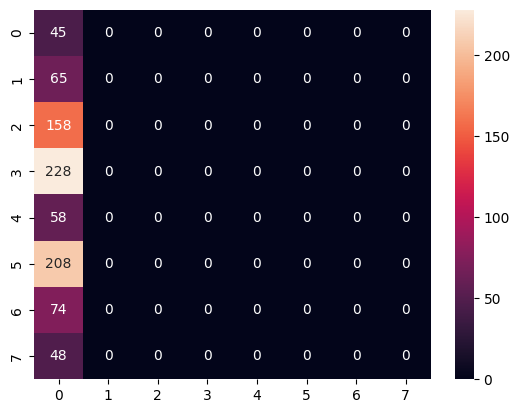

In [119]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Test set classifiction metrics

In [120]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy: 0.0369


In [121]:
print('Precision: {:0.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))

Precision: 0.0046


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
print('Recall: {:0.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))

Recall: 0.1250


In [123]:
print('F1-Score: {:0.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))

F1-Score: 0.0089


In [124]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.04      1.00      0.07        14
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        65
           3       0.00      0.00      0.00        89
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        96
           6       0.00      0.00      0.00        39
           7       0.00      0.00      0.00        17

    accuracy                           0.04       379
   macro avg       0.00      0.12      0.01       379
weighted avg       0.00      0.04      0.00       379



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[14,  0,  0,  0,  0,  0,  0,  0],
       [40,  0,  0,  0,  0,  0,  0,  0],
       [65,  0,  0,  0,  0,  0,  0,  0],
       [89,  0,  0,  0,  0,  0,  0,  0],
       [19,  0,  0,  0,  0,  0,  0,  0],
       [96,  0,  0,  0,  0,  0,  0,  0],
       [39,  0,  0,  0,  0,  0,  0,  0],
       [17,  0,  0,  0,  0,  0,  0,  0]])

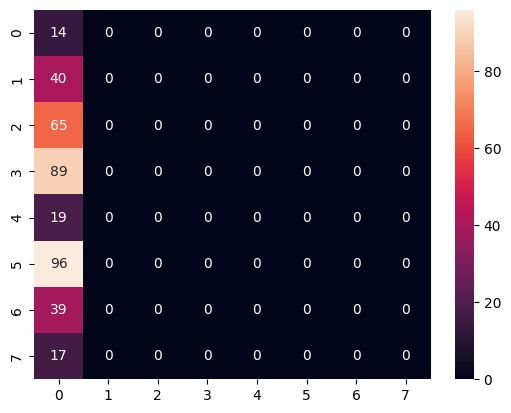

In [126]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### AutoML evaluation

In [85]:
automl.leaderboard(ensemble_only=False)

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
19,1,1.0,random_forest,0.424966,28.171398
15,2,0.0,random_forest,0.438285,28.443789
5,3,0.0,libsvm_svc,0.438598,5.288009
4,4,0.0,gradient_boosting,0.439251,9.903812
2,5,0.0,random_forest,0.443862,19.601268
16,6,0.0,gradient_boosting,0.447526,56.954049
9,7,0.0,gradient_boosting,0.451049,45.359714
11,8,0.0,gradient_boosting,0.469872,38.326769
13,9,0.0,extra_trees,0.473599,12.172187


In [86]:
automl.leaderboard(ensemble_only=True)

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
19,1,1.0,random_forest,0.424966,28.171398


In [87]:
automl.get_models_with_weights()

[(1.0,
  SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.6779841015398226, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 14, 'classifier:random_forest:min_samples_split': 14, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max': 0.9772109830437746, 'data_preprocessor:feat

In [88]:
automl.show_models()

{19: {'model_id': 19,
  'rank': 1,
  'cost': 0.424966012218852,
  'ensemble_weight': 1.0,
  'voting_model': VotingClassifier(estimators=None, voting='soft'),
  'estimators': [{'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7bbdcfc38490>,
    'balancing': Balancing(random_state=1, strategy='weighting'),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7bbdc75cb910>,
    'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7bbdc75c94e0>,
    'sklearn_classifier': RandomForestClassifier(criterion='entropy', max_features=4, min_samples_leaf=14,
                           min_samples_split=14, n_estimators=512, n_jobs=1,
                           random_state=1, warm_start=True)},
   {'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7bbdc3feb340>,
    'balancing': Balancing(random_state=1, s

In [ ]:
# get i from the output above to extract the best model
i = 5
rf_automl = automl.show_models()[i]['sklearn_classifier']
rf_automl

## Train best model using sklearn

In [ ]:
# copy paste hyperparameters from above here
rf = ensemble.RandomForestClassifier(
    criterion='entropy', max_features=12, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True
)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=12, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)

## Convert a sklearn classifier object to a list of strings

In [ ]:
import time

In [ ]:
# convert the estimator into a list of strings
# this function also works with the ensemble.ExtraTrees estimator
start_time = time.perf_counter()
trees = ml.rf_to_strings(rf, X_train.columns)
end_time = time.perf_counter()
run_time = round((end_time - start_time) / 60, 2)
print('Run time: {} minutes.'.format(run_time))

Run time: 1.51 minutes.


In [ ]:
# print the first tree to see the result
print(trees[0])

1) root 1256 9999 9999 (172.41384660187222)
  2) B3 <= 1315.549988 1256 0.9985 1
    4) B8 <= 2533.242798 757 0.9227 0
      8) B8 <= 2210.166626 559 0.8423 0
        16) B4 <= 1155.531250 212 0.6453 0
          32) B4 <= 988.968750 57 0.0897 0
            64) B3 <= 997.000000 15 0.0000 0 *
            65) B3 > 997.000000 6 0.5917 0 *
          33) B4 > 988.968750 36 0.0000 0 *
        17) B4 > 1155.531250 212 0.6453 0
          34) B2 <= 1315.803589 155 0.7617 0
            68) B3 <= 1177.937500 141 0.7016 0
              136) B3 <= 1117.525024 97 0.5723 0
                272) B3 <= 1108.150024 63 0.6898 0
                  544) B8 <= 2137.902710 57 0.6072 0
                    1088) B2 <= 1118.047607 17 0.0000 0 *
                    1089) B2 > 1118.047607 43 0.4350 0
                      2178) B8 <= 1954.375000 10 0.9852 0 *
                      2179) B8 > 1954.375000 16 0.0000 0 *
                  545) B8 > 2137.902710 57 0.6072 0
                    1090) B8 <= 2159.229126 7 1.

In [ ]:
print(trees[1])

1) root 1258 9999 9999 (162.61947037511516)
  2) B4 <= 1621.663452 1258 0.9991 0
    4) B2 <= 1362.857117 701 0.8458 0
      8) B4 <= 990.772736 35 0.0000 0 *
      9) B4 > 990.772736 639 0.8094 0
        18) B8 <= 2221.000000 604 0.8303 0
          36) B2 <= 1202.854187 214 0.4912 0
            72) B4 <= 1050.322937 10 0.0000 0 *
            73) B4 > 1050.322937 122 0.3767 0
              146) B8 <= 2016.033325 112 0.4006 0
                292) B8 <= 1959.910706 46 0.1914 0
                  584) B8 <= 1871.500000 12 0.0000 0 *
                  585) B8 > 1871.500000 35 0.2539 0
                    1170) B8 <= 1950.750000 23 0.3451 0
                      2340) B2 <= 1150.166687 11 0.0000 0 *
                      2341) B2 > 1150.166687 6 0.6500 0 *
                    1171) B8 > 1950.750000 6 0.5033 0 *
                293) B8 > 1959.910706 11 0.0000 0 *
              147) B8 > 2016.033325 112 0.4006 0
                294) B4 <= 1070.090271 7 0.8813 0 *
                295) B4 > 1070

In [ ]:
# number of trees we converted should equal the number of trees we defined for the model
len(trees) == n_trees

False

## Convert sklearn classifier to GEE classifier

At this point you can take the list of strings and save them locally to avoid training again. However, we want to use the model with EE so we need to create an ee.Classifier and persist the data on ee for best results.

In [ ]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)

In [ ]:
ee_classifier.getInfo()

Output hidden; open in https://colab.research.google.com to view.

## Save trees to the cloud

Now we have the strings in a format that ee can use, we want to save it for later use. There is a function to export a list of tree strings to a feature collection. The feature collection will have a pro

In [ ]:
user_id = geemap.ee_user_id()
user_id

'users/alexvmt'

In [ ]:
# specify asset id where to save trees
# be sure to change <user_name> to your ee user name
asset_id = user_id + "/random_forest_strings_test"
asset_id

'users/alexvmt/random_forest_strings_test'

In [ ]:
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

# this will kick off an export task, so wait a few minutes before moving on

## Save trees locally

In [ ]:
import os

out_csv = os.path.expanduser("trees.csv")

In [ ]:
ml.trees_to_csv(trees, out_csv)

In [ ]:
another_classifier = ml.csv_to_classifier(out_csv)